In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline
from scipy.stats import skew
import pylab as p 
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats.mstats import gmean
from scipy.stats.mstats import hmean
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import numpy

In [23]:
data = pd.read_csv(r'/Users/hridoy/Desktop/Research Analysis/Data Analysis statistics1 - Sheet3.tsv', sep = "\t")

print(data)

    INCOME EXPENSES
0   50,000   45,000
1    30000    25000
2    35000    35000
3    60000    50000
4    25000    20000
5    30000    25000
6    25000    22000
7   100000   100000
8   50,000   45,000
9    90000    70000
10   40000    40000
11   20000    15000
12   70000    50000
13   55000    60000
14   80000    60000
15   20000    20000
16   55000    60000
17   50000    45000
18   45000    50000
19   45000    35000
20   70000    60000
21   70000    70000
22   80000    50000
23   95000    90000
24   30000    25000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   INCOME    25 non-null     object
 1   EXPENSES  25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes


In [25]:
data.replace(',','', regex=True, inplace=True)

In [26]:
data['INCOME'] = data['INCOME'].astype('float')
data['EXPENSES'] = data['EXPENSES'].astype('float')
data.dtypes

INCOME      float64
EXPENSES    float64
dtype: object

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INCOME    25 non-null     float64
 1   EXPENSES  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [28]:
data.describe()

,INCOME,EXPENSES
count,25.000000,25.000000
mean,52800.000000,46680.000000
std,23895.606291,21730.776946
min,20000.000000,15000.000000
25%,30000.000000,25000.000000
50%,50000.000000,45000.000000
75%,70000.000000,60000.000000
max,100000.000000,100000.000000


In [31]:
data['INCOME'].mode()

0    30000.0
1    50000.0
2    70000.0
dtype: float64

In [32]:
data['EXPENSES'].mode()

0    50000.0
1    60000.0
dtype: float64

In [33]:
data['INCOME'].median()

50000.0

In [34]:
data['EXPENSES'].median()

45000.0

In [35]:
md1 = data['INCOME'].mad()
md2 = data['EXPENSES'].mad()
print ('The Mean Deviation of Income is: ' + str(md1))
print ('The Mean Deviation of Expenses is: ' + str(md2))

The Mean Deviation of Income is: 19536.0
The Mean Deviation of Expenses is: 16787.2


In [36]:
std1 = data['INCOME'].std()
std2 = data['EXPENSES'].std()
print ('The Standard Deviation of Income is: ' + str(std1))
print ('The Standard Deviation of Expenses is: ' + str(std2))

The Standard Deviation of Income is: 23895.60629069704
The Standard Deviation of Expenses is: 21730.776945766727


In [37]:
var1 = data['INCOME'].var()
var2 = data['EXPENSES'].var()
print ('The varience of Income is: ' + str(var1))
print ('The varience  of Expenses is: ' + str(var2))

The varience of Income is: 571000000.0
The varience  of Expenses is: 472226666.6666667


In [51]:
mean1 = data['INCOME'].mean()
mean2 = data['EXPENSES'].mean()
std1 = data['INCOME'].std()
std2 = data['EXPENSES'].std()
cv1 = (std1/mean1)*100
cv2 = (std2/mean2)*100

print ('The coeffient varience of Income is: ' + str(cv1))
print ('The coeffient varience  of Expenses is: ' + str(cv2))

The coeffient varience of Income is: 45.25683009601712
The coeffient varience  of Expenses is: 46.552649840974134


In [39]:
gm1 = gmean(data.loc[:,'INCOME'])
gm2 = gmean(data.loc[:,'EXPENSES'])
print ('The Geometric Mean of Income is: ' + str(gm1))
print ('The Geometric Mean of Expenses is: ' + str(gm2))

The Geometric Mean of Income is: 47472.636016361
The Geometric Mean of Expenses is: 41752.8425222207


In [40]:
hm1 = hmean(data.loc[:,'INCOME'])
hm2 = hmean(data.loc[:,'EXPENSES'])
print ('The Harmonic Mean of Income is: ' + str(hm1))
print ('The Harmonic Mean of Expenses is: ' + str(hm2))

The Harmonic Mean of Income is: 42334.08139512452
The Harmonic Mean of Expenses is: 36912.35844936135


The boxplot of Income is: AxesSubplot(0.125,0.125;0.775x0.755)


/Users/hridoy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


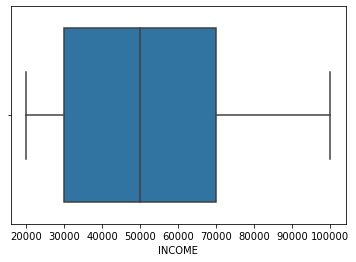

In [41]:
bp1 = sns.boxplot(data.INCOME);
print ('The boxplot of Income is: ' + str(bp1))


The boxplot of Income is: AxesSubplot(0.125,0.125;0.775x0.755)


/Users/hridoy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


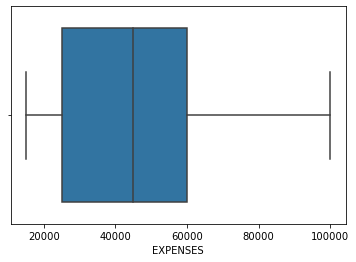

In [42]:
bp2 = sns.boxplot(data.EXPENSES);
print ('The boxplot of Income is: ' + str(bp2))

In [43]:
x = data['INCOME']
y = data['EXPENSES']
r1 = x.corr(y) # Pearson's r
r2 = y.corr(x) # Pearson's r
rho1 = x.corr(y, method='spearman')  # Spearman's rho
rho2 = y.corr(x, method='spearman') # Spearman's rho

print ('The Pearsons r is: ' + str(r1))
print ('The Pearsons r is: ' + str(r2))
print ('The Spearmans rho is: ' + str(rho1))
print ('The Spearmans rho is: ' + str(rho2))

The Pearsons r is: 0.9333935121613717
The Pearsons r is: 0.9333935121613718
The Spearmans rho is: 0.9475966663373181
The Spearmans rho is: 0.9475966663373181


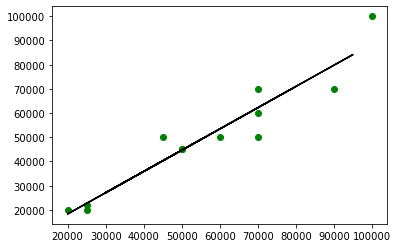

In [44]:
X = data.iloc[:, :-1].values 

y = data.iloc[:, 1].values 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) 

from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 

regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)

plt.scatter(X_train, y_train,color='g') 

plt.plot(X_test, y_pred,color='k') 



plt.show()

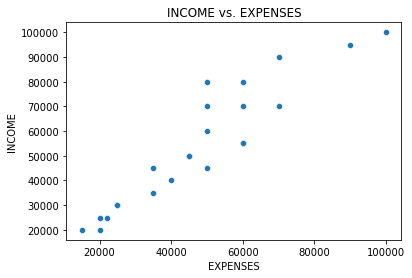

In [45]:
ax = sns.scatterplot(x="EXPENSES", y="INCOME", data=data)
ax.set_title("INCOME vs. EXPENSES")
ax.set_xlabel("EXPENSES");

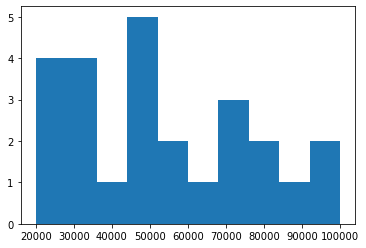

In [46]:
x = data['INCOME']
plt.hist(x)
plt.show()

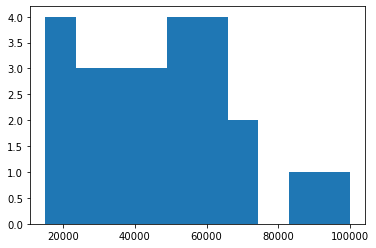

In [47]:
y = data['EXPENSES']
plt.hist(y)
plt.show()

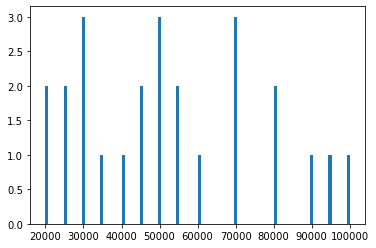

In [48]:
x = data['INCOME']

plt.hist(x, 100)
plt.show()

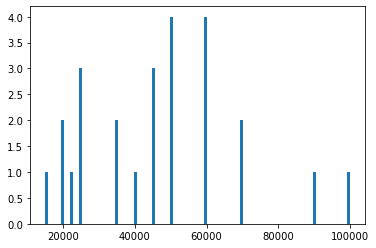

In [49]:
y = data['EXPENSES']

plt.hist(y, 100)
plt.show()